In [1]:
from lava.lib.dnf.operations.operations import Weights
from lava.lib.dnf.operations.operations import *
from lava.proc.lif.process import LIF
from lava.lib.dnf.inputs.rate_code_spike_gen.process import RateCodeSpikeGen
# one to one connect excitatory layers to themselves.
from lava.lib.dnf.connect.connect import connect
from lava.lib.dnf.operations.operations import Weights
from lava.magma.core.run_configs import Loihi1SimCfg #Loihi simulator, not  Loihi itself.
from lava.magma.core.run_conditions import RunSteps
from lava.proc.monitor.process import Monitor
from lava.proc.monitor.models import PyMonitorModel
from lava.lib.dnf.inputs.gauss_pattern.process import GaussPattern
from lava.lib.dnf.kernels.kernels import MultiPeakKernel
import numpy as np



In [2]:
ncolumns=2
#?GaussPattern

In [3]:
ly_2_3_ex = np.ndarray((ncolumns),dtype=object)#,LIF()))
ly_4_ex = np.ndarray((ncolumns),dtype=object)#LIF))
ly_5_ex = np.ndarray((ncolumns),dtype=object)#,LIF))
ly_6_ex = np.ndarray((ncolumns),dtype=object)#,LIF))


ly_2_3_in = np.ndarray((ncolumns),dtype=object)#,LIF))
ly_4_in = np.ndarray((ncolumns),dtype=object)#,LIF))
ly_5_in = np.ndarray((ncolumns),dtype=object)#,LIF))
ly_6_in = np.ndarray((ncolumns),dtype=object)#,LIF))

ncells = 125
for i in range(0,ncolumns):
    ly_2_3_ex[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)
    ly_4_ex[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)
    ly_5_ex[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)
    ly_6_ex[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)


    ly_2_3_in[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)
    ly_4_in[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)
    ly_5_in[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)
    ly_6_in[i] = LIF(shape=(ncells,), du=2047, dv=2047, vth=200)

    

In [4]:

connections=[]
for i in range(0,ncolumns):
        
    one2onec = connect(ly_2_3_ex[i].s_out, ly_2_3_ex[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)

    #ly_4_ex[i] 2 ly_4_ex[i]
            
    one2onec = connect(ly_4_ex[i].s_out, ly_4_ex[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)

    #ly_5_ex[i] 2 ly_5_ex[i]
    one2onec = connect(ly_5_ex[i].s_out, ly_5_ex[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)

    #ly_6_ex[i] 2 ly_6_ex[i]
    one2onec = connect(ly_6_ex[i].s_out, ly_6_ex[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)



In [5]:
    
# one to one connect inhibitory layers to themselves.

for i in range(0,ncolumns):
    #ly_2_3_in[i] 2 ly_2_3_in[i]
    one2onec = connect(ly_2_3_in[i].s_out, ly_2_3_in[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

    #ly_4_in[i] 2 ly_4_in[i]
    one2onec = connect(ly_4_in[i].s_out, ly_4_in[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

    #ly_5_in[i] 2 ly_5_in[i]
    one2onec = connect(ly_5_in[i].s_out, ly_5_in[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

    #ly_6_in[i] 2 ly_6_in[i]
    one2onec = connect(ly_6_in[i].s_out, ly_6_in[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

# one to one connect inhibitory layers to exc.


# one to one connect exc layers to inhib.

for i in range(0,ncolumns):

    #ly_2_3_ex[i] 2 ly_2_3_in[i]
    one2onec = connect(ly_2_3_ex[i].s_out, ly_2_3_in[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)

    #ly_4_ex[i] 2 ly_4_in[i]
    one2onec = connect(ly_4_ex[i].s_out, ly_4_in[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)

    #ly_5_ex[i] 2 ly_5_in[i]
    one2onec = connect(ly_5_ex[i].s_out, ly_5_in[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)

    #ly_6_ex[i] 2 ly_6_in[i]
    one2onec = connect(ly_6_ex[i].s_out, ly_6_in[i].a_in, ops=[Weights(len(ly_2_3_ex))])
    connections.append(one2onec)

    
for i in range(0,ncolumns):
    #ly_2_3_in[i] 2 ly_2_3_exc[i]
    ly_2_3_ex
    one2onec = connect(ly_2_3_in[i].s_out, ly_2_3_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

    #ly_4_in[i] 2 ly_4_exc[i]
    one2onec = connect(ly_4_in[i].s_out, ly_4_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)

    #ly_5_in[i] 2 ly_5_exc[i]
    one2onec = connect(ly_5_in[i].s_out, ly_5_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)
    
    #ly_6_in[i] 2 ly_6_exc[i]
    one2onec = connect(ly_6_in[i].s_out, ly_6_ex[i].a_in, ops=[Weights(-1.0)])
    connections.append(one2onec)
    



<img src="Schematic-diagram-of-the-Potjans-Diesmann-cortical-microcircuit-model.png" 
     width="300" 
     height="350" />



In [7]:

spike_generator_1 = RateCodeSpikeGen(shape=ncells,)
#print(dir(spike_generator_1))
#print(spike_generator_1.inter_spike_distances)
#print(spike_generator_1.min_spike_rate)
#print(spike_generator_1.spikes)

center_cell=65
spread_across_number_of_cells=150.0 # 125
gauss_pattern_1 = GaussPattern(shape=ncells,
                               amplitude=60,
                               mean=center_cell,
                               stddev=spread_across_number_of_cells)
gauss_pattern_1.a_out.connect(spike_generator_1.a_in)
# You may change parameters of the Gaussian pattern during runtime
#gauss_pattern_1.amplitude = 50

#self.spike_generator_2 = RateCodeSpikeGen(shape=shape)



for i in range(0,ncolumns):
    #print(len(ly_4_ex))
    _=connect(spike_generator_1.s_out, ly_4_ex[i].a_in, [Weights(len(ly_4_ex))])
    #_=connect(spike_generator_1.s_out, ly_5_ex[i].a_in, [Weights(len(ly_5_ex))])


In [8]:
# Set up a run configuration
#run_cfg = Loihi1SimCfg(select_tag="bit_accurate_loihi")



time_steps = 250

monitor_dnf = Monitor()
monitor_dnf.probe(target=ly_4_ex[0].s_out, num_steps=time_steps)
monitor_ly_2_3_in = Monitor()
monitor_ly_2_3_in.probe(target=ly_2_3_in[0].s_out, num_steps=time_steps)


monitor_input_1 = Monitor()
monitor_input_1.probe(spike_generator_1.s_out, time_steps)

#condition = RunSteps(num_steps=time_steps)
#for i in range(0,ncolumns):
ly_4_ex[0].amplitude = 10000
ly_4_ex[0].run(condition=RunSteps(num_steps=time_steps),
        run_cfg=Loihi1SimCfg(select_tag='floating_pt'))
ly_2_3_in[0].amplitude = 10000
ly_2_3_in[0].run(condition=RunSteps(num_steps=time_steps),
        run_cfg=Loihi1SimCfg(select_tag='floating_pt'))
#ly_5_ex[1].amplitude = 10000
#ly_5_in[1].run(condition=RunSteps(num_steps=time_steps),
#        run_cfg=Loihi1SimCfg(select_tag='floating_pt'))
#run(condition=condition, run_cfg=run_cfg)




/home/user/miniconda3/lib/python3.9/site-packages/lava/proc/lif/models.py:36: RuntimeWarning: overflow encountered in multiply
  self.u[:] = self.u * (1 - self.du)
/home/user/miniconda3/lib/python3.9/site-packages/lava/proc/lif/models.py:36: RuntimeWarning: overflow encountered in multiply
  self.u[:] = self.u * (1 - self.du)
/home/user/miniconda3/lib/python3.9/site-packages/lava/proc/lif/models.py:39: RuntimeWarning: overflow encountered in multiply
  self.v[:] = self.v * (1 - self.dv) + self.u + bias
/home/user/miniconda3/lib/python3.9/site-packages/lava/proc/lif/models.py:39: RuntimeWarning: overflow encountered in multiply
  self.v[:] = self.v * (1 - self.dv) + self.u + bias
/home/user/miniconda3/lib/python3.9/site-packages/lava/proc/lif/models.py:36: RuntimeWarning: overflow encountered in multiply
  self.u[:] = self.u * (1 - self.du)
/home/user/miniconda3/lib/python3.9/site-packages/lava/proc/lif/models.py:36: RuntimeWarning: overflow encountered in multiply
  self.u[:] = self.u 

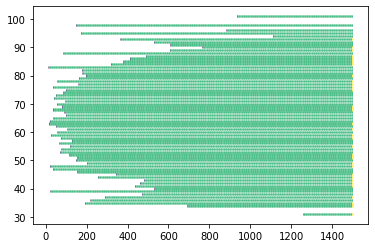

In [9]:
# Get probed data from monitors

#from utils import plot_1d, animated_1d_plot
data_dnf = monitor_dnf.get_data()\
    [ly_4_ex[0].name][ly_4_ex[0].s_out.name]

data_input1 = monitor_input_1.get_data()\
    [spike_generator_1.name][spike_generator_1.s_out.name]
#print(data_input1)
#print(np.std(data_dnf))
#print(np.std(data_input1))

#print(monitor_dnf.get_data())
#print(monitor_input_1.get_data())
from lava.lib.dnf.utils.plotting import raster_plot

raster_plot(data_dnf.T)



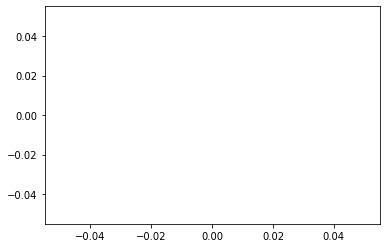

In [10]:
#monitor_ly_2_3_in

#data_ly_2_3_in = monitor_ly_2_3_in.get_data()
    
#print(data_ly_2_3_in['Process_4']['s_out'])
data_ly_2_3_in = monitor_ly_2_3_in.get_data()
#print(data_ly_2_3_in)
#print(ly_2_3_in[0].name)
data_ly_2_3_in = monitor_ly_2_3_in.get_data()\
    [ly_2_3_in[0].name][ly_2_3_in[0].s_out.name]
raster_plot(data_ly_2_3_in.T)


0.4138202233734945


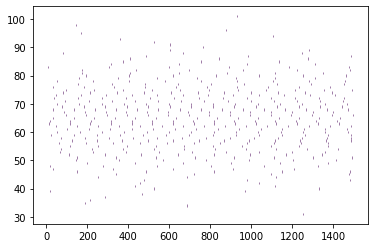

In [11]:
print(np.std(data_dnf))

raster_plot(data_input1.T)



In [12]:
print(np.mean(data_dnf))
print(np.sum(data_dnf))
print(len(data_dnf[data_dnf!=0]))
print(len(data_dnf[2]))


0.21937066666666666
41132.0
41132
1500


In [13]:
#for i in data_dnf: print(i)
print(data_dnf.data)    
    